# Tree-based classification model
For binary classification problem, I personally prefer decision tree type prediction model, due to its multiple advantages, such as highly automatical learning process, exclude unimportant features, can be used in large/small datasets, and most importantly, the result is easily understand and descriptive. Starting from the simplest decision tree(cart), then try ensemble model such as random forest and boosting, after evaluating model performance, modify model with tuning parameters

### Prepare and final check the feature.csv
#### 1. Load in all_feature_wt_device_wo_precent.csv

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [212]:
import pandas as pd
import numpy as np

In [213]:
all_feature_dd = pd.read_csv("D:/MusicFile/all_feature_dd_8366.csv", index_col = 0)
#use index_col =0, the first col will be set as row_name
#dd has device dummy variable(ar, ip, both)
#all_feature_nd = pd.read_csv("D:/MusicFile/all_feature_nd.csv", index_col = 0)
#nd has no device feature

In [214]:
print(all_feature_dd.shape)
all_feature_dd.sample(8)

(8366, 31)


freq_play_last_30_days  avg_playtime_last_30_days  \
uid                                                            
154635424                     0.0                   0.000000   
168544752                  1063.0                 182.139229   
168545616                   539.0                 186.998474   
154481904                     0.0                   0.000000   
168827984                   168.0                 103.690476   
152059840                    42.0                 127.690476   
168394480                   321.0                 129.595016   
167717776                    52.0                 131.576923   

           freq_play_last_21_days  avg_playtime_last_21_days  \
uid                                                            
154635424                     0.0                   0.000000   
168544752                   569.0                 179.557118   
168545616                   281.0                 174.634084   
154481904                     0.0                   0.000000   
168827984                    74.0                 101.513514   
152059840                     0.0                   0.000000   
168394480                   179.0                 135.351955   
167717776                    39.0                 150.615385   

           freq_play_last_14_days  avg_playtime_last_14_days  \
uid                                                            
154635424                     0.0                   0.000000   
168544752                   393.0                 177.501272   
168545616                   223.0                 203.157747   
154481904                     0.0                   0.000000   
168827984                    70.0                 101.128571   
152059840                     0.0                   0.000000   
168394480                   132.0                 136.143939   
167717776                    36.0                 151.333333   

           freq_play_last_7_days  avg_playtime_last_7_days  \
uid                                                          
154635424                    0.0                  0.000000   
168544752                  135.0                179.066667   
168545616                   85.0                201.141176   
154481904                    0.0                  0.000000   
168827984                   29.0                115.206897   
152059840                    0.0                  0.000000   
168394480                   39.0                157.333333   
167717776                    6.0                 82.166667   

           freq_play_last_3_days  avg_playtime_last_3_days    ...      \
uid                                                           ...       
154635424                    0.0                  0.000000    ...       
168544752                   34.0                146.647059    ...       
168545616                   30.0                200.600000    ...       
154481904                    0.0                  0.000000    ...       
168827984                    0.0                  0.000000    ...       
152059840                    0.0                  0.000000    ...       
168394480                   16.0                134.687500    ...       
167717776                    6.0                 82.166667    ...       

           freq_download_last_7_days  freq_download_last_3_days  \
uid                                                               
154635424                        0.0                        0.0   
168544752                        0.0                        0.0   
168545616                       15.0                       13.0   
154481904                        0.0                        0.0   
168827984                       42.0                       40.0   
152059840                        0.0                        0.0   
168394480                        6.0                        4.0   
167717776                       10.0                       10.0   

           freq_download_last_1_days  last_search  last_download 

In [344]:
all_feature_dd.columns

Index(['freq_play_last_30_days', 'avg_playtime_last_30_days',
       'freq_play_last_21_days', 'avg_playtime_last_21_days',
       'freq_play_last_14_days', 'avg_playtime_last_14_days',
       'freq_play_last_7_days', 'avg_playtime_last_7_days',
       'freq_play_last_3_days', 'avg_playtime_last_3_days',
       'freq_play_last_1_days', 'avg_playtime_last_1_days',
       'freq_search_last_30_days', 'freq_search_last_21_days',
       'freq_search_last_14_days', 'freq_search_last_7_days',
       'freq_search_last_3_days', 'freq_search_last_1_days',
       'freq_download_last_30_days', 'freq_download_last_21_days',
       'freq_download_last_14_days', 'freq_download_last_7_days',
       'freq_download_last_3_days', 'freq_download_last_1_days', 'last_search',
       'last_download', 'Churn', 'last_play', 'device_ar', 'device_both',
       'device_ip'],
      dtype='object')

In [215]:
#check balance of positive/negative 
label = all_feature_dd['Churn']
label.value_counts()

0    4464
1    3902
Name: Churn, dtype: int64

#### 2 SCALE
since almost feature are frequency(in the same scaler). If only use these features..no need to do scaling, but if we add device, it's better to scale. Besides, since tree based models have different principle than other algorithm like SVM..

In [ ]:
from sklearn import preprocessing

In [16]:
all_feature_dd_scale = all_feature_dd.drop(['Churn', 'device_ar', 'device_ip', 'device_both'])
scaler = preprocessing.StandardScaler().fit(all_feature_dd_scale)
feature_scaled = scaler.transform(df[features[1: ]])

SyntaxError: invalid syntax (<ipython-input-16-e5319603a529>, line 1)

### 2. Build Decision Tree model
#### 2.1 Split train/test set
first just split train/test as 75/25 for simple tree model


In [216]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, \
                            classification_report, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            roc_curve, \
                            roc_auc_score, \
                        matthews_corrcoef, \
                        f1_score, \
                        auc
                        


In [217]:
from sklearn import tree

Important parameter: 

- criterion: gini/entropy
- splitter: best/random
- max_features: None(feature<50), log2, sqrt
- max_depth : 10~100
- min_samples_split/min_samples_leaf: for large datasize, increase(10w >10/5)
- min_weight_fraction_leaf: defualt = 0, if lots of NaN, or imbalanced classification, need to change
            
Decision tree visualization
- graphviz(install from [download_link](http://www.graphviz.org/)>>set environment path >> pip install graphviz >> pip install pydotplus


#### 2.2 Build Model

In [227]:
clf = tree.DecisionTreeClassifier(max_depth=10, max_features = 5)

In [228]:
clf
#features mentioned above, such as max_depth, max_leaf_nodes, etc help prevent overfitting the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [220]:
#split target and features
X = all_feature_dd.drop('Churn', axis = 1)
y = all_feature_dd['Churn']

In [221]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 2)

In [222]:
X_train.shape

(6274, 30)

In [229]:
model = clf.fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [230]:
#Make prediction on training data
#prob is the probability
y_train_pred = clf.predict(X_train)
y_train_prob = clf.predict_proba(X_train)[:, 1]

#make prediction on test data
y_valid_pred = clf.predict(X_valid)
y_valid_prob = clf.predict_proba(X_valid)[:, 1]



In [ ]:
#Make prediction on training data
#prob is the probability
y_train_pred = clf.predict(X_train)
y_train_prob = clf.predict_proba(X_train)[:, 1]

#make prediction on test data
y_valid_pred = clf.predict(X_valid)
y_valid_prob = clf.predict_proba(X_valid)[:, 1]
get_performance_metrics(ytrain, ytrain_p, yvalid, yvalid_p)
get_confusion_matrix(y_valid, y_predict)
plot_roc_curve(y_train, y_train_prob, y_valid, y_valid_prob, model)

#### 2.3 Evaluation

In [225]:
metrics_list = ['Accuracy', 'Precision', 'Recall', 'AUC', 'F1_Score']
# 'Confusion_matrix']
def get_performance_metrics(ytrain, ytrain_p, yvalid, yvalid_p):
    metrics_df = pd.DataFrame(columns = ['train', 'valid'])
    metrics_df.loc['Accuracy'] = [accuracy_score(ytrain, ytrain_p), accuracy_score(yvalid, yvalid_p)]
    metrics_df.loc['Precision'] = [precision_score(ytrain, ytrain_p), precision_score(yvalid, yvalid_p)]
    metrics_df.loc['Recall'] = [recall_score(ytrain, ytrain_p), recall_score(yvalid, yvalid_p)]
    metrics_df.loc['f1_score'] = [f1_score(ytrain, ytrain_p), f1_score(yvalid, yvalid_p)]
    metrics_df.loc['AUC'] = [roc_auc_score(ytrain, ytrain_p), roc_auc_score(yvalid, yvalid_p)]
    metrics_df.loc['Matthews_Corrcoef'] = [matthews_corrcoef(ytrain, ytrain_p), matthews_corrcoef(yvalid, yvalid_p)]
    return metrics_df

def get_confusion_matrix(y_valid, y_predict):
    cm = pd.DataFrame(confusion_matrix(y_valid, y_predict), \
                      columns = ['Predicted Active', 'Predicted Churn'], \
                      index = ['True Active', 'True Churn'])
    return cm

def plot_roc_curve(y_train, y_train_prob, y_valid, y_valid_prob, model):
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    fpr_valid, tpr_valid, threshold_valid = roc_curve(y_valid, y_valid_prob)
    roc_auc_train = auc(fpr, tpr)
    roc_auc_valid = auc(fpr_valid, tpr_valid)
    
    #plot roc curve
    plt.figure()
    plt.title('Receiver Operating Characteristic of ' + model)
    plt.plot(fpr, tpr, 'b', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_valid, tpr_valid, 'r', label = 'Valid AUC = %0.2f' % roc_auc_valid)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [231]:
#get the model preformance
dt_pm = get_performance_metrics(y_train, y_train_pred, y_valid, y_valid_pred)
dt_pm

train     valid
Accuracy           0.974498  0.930688
Precision          0.958923  0.916746
Recall             0.986833  0.942913
f1_score           0.972678  0.929646
AUC                0.975412  0.931029
Matthews_Corrcoef  0.949121  0.861704

In [232]:
#get confusion_matrix
get_confusion_matrix(y_valid, y_valid_pred)

Predicted Active  Predicted Churn
True Active               989               87
True Churn                 58              958

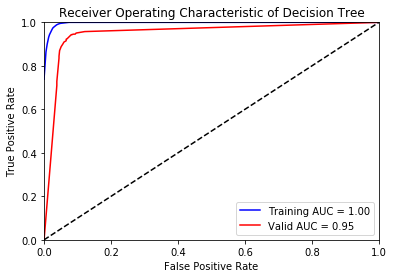

In [233]:
#get roc_curve
plot_roc_curve(y_train, y_train_prob, y_valid, y_valid_prob, 'Decision Tree')

#### 2.4 Tree Visualization

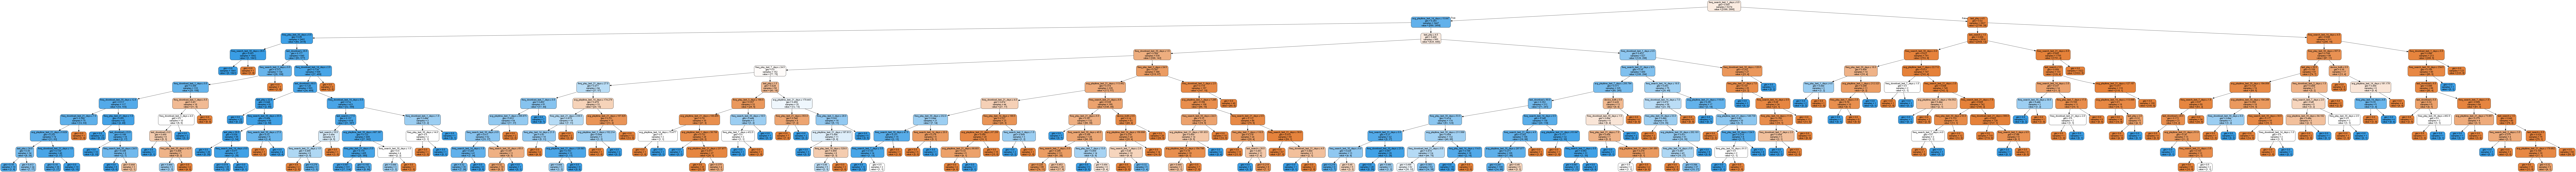

In [234]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(model, out_file = None,
                                feature_names = X.columns, \
                               filled = True, rounded = True, \
                               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#tree.export_graphviz(model.tree_, out_file='tree.dot', feature_names=X.columns)
#from subprocess import call
#call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

In [235]:
#save the DT
graph.write_pdf("D:/MusicFile/DT.pdf")

True

#### 2.5 Feature Importance

In [56]:
importance = clf.feature_importances_

In [236]:
fi_DT = pd.DataFrame(data = clf.feature_importances_, index = X.columns, columns = ['feature_importance']) 
print(fi_DT.sort_values('feature_importance', ascending = False).index.values[:10])
fi_DT.sort_values('feature_importance', ascending = False)

['freq_search_last_1_days' 'avg_playtime_last_14_days' 'last_play'
 'freq_download_last_30_days' 'freq_search_last_30_days'
 'freq_download_last_1_days' 'freq_play_last_30_days'
 'avg_playtime_last_21_days' 'freq_play_last_21_days'
 'freq_play_last_14_days']


feature_importance
freq_search_last_1_days               0.723497
avg_playtime_last_14_days             0.132915
last_play                             0.033847
freq_download_last_30_days            0.010288
freq_search_last_30_days              0.010133
freq_download_last_1_days             0.010074
freq_play_last_30_days                0.009954
avg_playtime_last_21_days             0.009847
freq_play_last_21_days                0.007210
freq_play_last_14_days                0.006304
freq_play_last_7_days                 0.004673
freq_download_last_21_days            0.004530
freq_search_last_21_days              0.004247
avg_playtime_last_30_days             0.003938
freq_download_last_14_days            0.003668
freq_play_last_3_days                 0.003319
last_download                         0.003225
avg_playtime_last_7_days              0.002888
last_search                           0.002847
freq_search_last_7_days               0.002652
freq_search_last_14_days              0.002304
freq_search_last_3_days               0.002054
avg_playtime_last_1_days              0.001419
freq_download_last_7_days             0.001236
device_both                           0.001214
freq_download_last_3_days             0.000793
freq_play_last_1_days                 0.000463
avg_playtime_last_3_days              0.000463
device_ar                             0.000000
device_ip                             0.000000

([<matplotlib.axis.XTick at 0x13e26d30>,
 <a list of 30 Text xticklabel objects>)

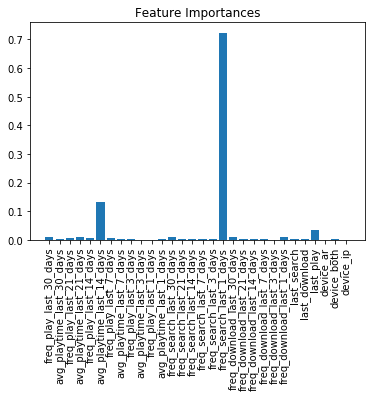

In [237]:
#plot feature importance
plt.title('Feature Importances')
plt.bar(np.arange(len(X.columns)), clf.feature_importances_)
plt.xticks(np.arange(len(X.columns)), X.columns, rotation = 'vertical')

In [348]:
parameters = {'max_depth':range(3,15), 'max_features':[3,5,8,10,12]}
clfp = GridSearchCV(clf, parameters, n_jobs=-1)
clfp.fit(X_train, y_train)
tree_model = clfp.best_estimator_
print (clfp.best_score_, clfp.best_params_)


0.9443736053554351 {'max_depth': 6, 'max_features': 5}


feature_importance of DT make sense, since we are using 14-day as time window to label churn, 14-day-search frequency feature speaks much louder than others. Also, the average play_time is also important for churn prediction.

## 3. Random Forest
important parameter of bagging
- number of estimators: max # of weak learner in the forest, too small will cause underfitting, too large cause overfitting. Increase this parameter will largely reduce bias/increase accuracy but make no effort to bias/variance of each estimator
- bootstrap: sample with replacement
- oob_score = True, just like cross validation
important parameter of decision tree
- max_features/max_leaf_nodes: auto means consider sqrt(N) features when split, for feature <50, use None(consider all features): 
- max_depth/min_samples_split = None/2 only adjust(↑) when for large size

more leaf nodes or depth means(rough tuning) the bias ↓, variance ↑, min_samples_splits/min_samples_leaf(refine tuning) means the less the more complex of weak learner
- n_jobs = -1(parallel computing, -1 means same as CPU)
- random_state = 50?

method:
- predict_proba(x): give prob for each label

### 3.1 Building Random Forest model

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [240]:
#just random give some parameters for RF
try_forest = RandomForestClassifier(n_estimators = 100,
                max_depth = 10,
                min_samples_split = 5,
                min_samples_leaf = 5, 
                oob_score = True,
                random_state = 100)
#not need to split train/test, so put all into RF model
try_forest.fit(X, y)
y_tpp = try_forest.predict_proba(X)[:,1]
print("oob score:", try_forest.oob_score_)
print("auc score:", roc_auc_score(y, y_tpp))
#try_forest.score(X_test, y_test)

oob score: 0.9481233564427445
auc score: 0.9961538655849679


In [241]:
fi_RF = pd.DataFrame(data = try_forest.feature_importances_, index = X.columns, columns = ['feature_importance']) 
print("Top 10 important feature:", fi_RF.sort_values('feature_importance', ascending = False).index.values[:9])
fi_RF.sort_values('feature_importance', ascending = False)


Top 10 important feature: ['freq_search_last_14_days' 'last_play' 'freq_search_last_7_days'
 'avg_playtime_last_7_days' 'freq_play_last_7_days'
 'freq_search_last_1_days' 'freq_play_last_14_days'
 'freq_search_last_21_days' 'freq_search_last_3_days']


feature_importance
freq_search_last_14_days              0.127194
last_play                             0.117869
freq_search_last_7_days               0.113502
avg_playtime_last_7_days              0.079211
freq_play_last_7_days                 0.076676
freq_search_last_1_days               0.074040
freq_play_last_14_days                0.066722
freq_search_last_21_days              0.055717
freq_search_last_3_days               0.051416
avg_playtime_last_14_days             0.037161
freq_search_last_30_days              0.034149
freq_play_last_21_days                0.027830
avg_playtime_last_21_days             0.021074
freq_play_last_3_days                 0.020811
freq_download_last_30_days            0.015881
avg_playtime_last_3_days              0.015873
freq_play_last_30_days                0.015747
last_search                           0.012745
freq_download_last_1_days             0.006279
avg_playtime_last_30_days             0.005380
last_download                         0.005103
freq_download_last_3_days             0.004941
freq_download_last_21_days            0.003887
avg_playtime_last_1_days              0.003033
freq_download_last_7_days             0.002556
freq_download_last_14_days            0.002495
freq_play_last_1_days                 0.001476
device_both                           0.000638
device_ar                             0.000542
device_ip                             0.000053

([<matplotlib.axis.YTick at 0x12334170>,
 <a list of 30 Text yticklabel objects>)

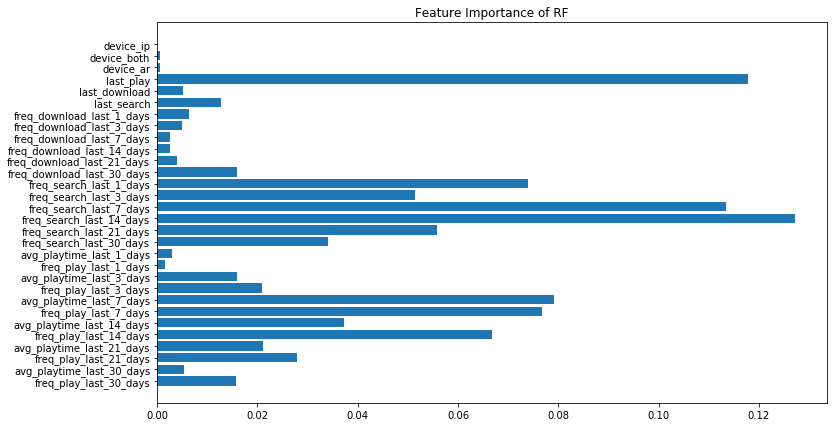

In [250]:
#plot feature importance
fig = plt.figure(figsize = (12,7))
plt.title("Feature Importance of RF")
plt.barh(np.arange(len(X.columns)), try_forest.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
#rotation = 'vertical'

### 3.2 parameter tuning
the main purpose for parameter tuning is to balance variance and bias, since at first, we only have a vague idea of those parameters, we can first try **RandomSearch** to narrow down the range of parameters, then use **GridSearch** to find the best combination


In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [58]:
try_forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)>

In [60]:
#first try random_grid search to find the rough range of each parameter
random_grid = {'n_estimators': np.arange(50, 500, 50, dtype = int),
               'max_depth': np.arange(10,100,10), 
               'min_samples_split': [2,5,10,20,50,100],
               'min_samples_leaf':[2,4,6,8,10,20,50]}
#!!before searching for the best parameter combination, have to fit data 
rfc = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', 
                             n_estimators = 50, oob_score = True)

In [15]:
random_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                          cv = 3, n_iter = 50, random_state = 22, n_jobs = -1)
random_rfc.fit(X,y)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]), 'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]), 'min_samples_split': [2, 5, 10, 20, 50, 100], 'min_samples_leaf': [2, 4, 6, 8, 10, 20, 50]},
          pre_dispatch='2*n_jobs', random_state=22, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [16]:
#check result
print(random_rfc.best_estimator_)
print(random_rfc.best_score_ , random_rfc.best_params_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
0.9162416411651366 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 10}


#### based on results of random search, we can now do grid search around those parameters


In [251]:
#grid_search
param_grid = {'n_estimators': [50, 100, 150,200],
              'max_depth': [5,10,15], 
              'min_samples_split': [3,5,8],
              'min_samples_leaf':[6,7,8,9,10]
             }


In [252]:

rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1)
rfc_grid_search.fit(X, y)
#grid_search.grid_score_, grid_search.best_estimator_, grid_search.best_score_

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [3, 5, 8], 'min_samples_leaf': [6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [253]:
#check result
print(rfc_grid_search.best_estimator_)
print(rfc_grid_search.best_score_ , rfc_grid_search.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
0.9073631365049007 {'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 50}


In [25]:
#check how each combination of parameters preformed 
pd.DataFrame(rfc_grid_search.cv_results_).head()

c:\users\tianyi fang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\tianyi fang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\tianyi fang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_tra

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.334690         0.118315         0.922362          0.952368   
1       0.573324         0.114920         0.920322          0.953077   
2       0.624059         0.109291         0.920435          0.952850   
3       0.665521         0.130724         0.921682          0.952510   
4       0.720714         0.124331         0.922362          0.953048   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               4                      5                       2   
1               4                      5                       2   
2               4                      5                       2   
3               4                      5                       2   
4               4                      5                       2   

  param_n_estimators                                             params  \
0                 60  {'max_depth': 4, 'min_samples_leaf': 5, 'min_s...   
1                 70  {'max_depth': 4, 'min_samples_leaf': 5, 'min_s...   
2                 80  {'max_depth': 4, 'min_samples_leaf': 5, 'min_s...   
3                 90  {'max_depth': 4, 'min_samples_leaf': 5, 'min_s...   
4                100  {'max_depth': 4, 'min_samples_leaf': 5, 'min_s...   

   rank_test_score       ...         split2_test_score  split2_train_score  \
0             2805       ...                  0.975071            0.943752   
1             3940       ...                  0.978470            0.944602   
2             3919       ...                  0.975637            0.944602   
3             3418       ...                  0.975071            0.944885   
4             2805       ...                  0.977904            0.944744   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.967687            0.945885           0.758503   
1           0.969388            0.946451           0.743764   
2           0.968254            0.946026           0.743197   
3           0.969388            0.945035           0.752268   
4           0.968254            0.946451           0.749433   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.975067      0.126402        0.017608        0.084761   
1            0.975351      0.047613        0.015595        0.090995   
2            0.974642      0.057374        0.008341        0.091104   
3            0.974784      0.113674        0.034865        0.087362   
4            0.975634      0.069712        0.022581        0.088815   

   std_train_score  
0         0.012650  
1         0.012339  
2         0.012168  
3         0.012185  
4         0.012456  

[5 rows x 24 columns]

### 3.3 Evaluate preformance of best RF model

In [60]:
rfbest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [254]:
rfbest = rfc_grid_search.best_estimator_

In [255]:
rfbest.fit(X,y)
y_pred = rfbest.predict_proba(X)[:,1]
print("oob score:", rfbest.oob_score_)
print("auc score:", roc_auc_score(y, y_pred))

oob score: 0.9474061678221373
auc score: 0.9957447035708182


In [256]:
rfbest_df= pd.DataFrame(data = rfbest.feature_importances_, index = X.columns, columns = ['feature_importance']) 
print("Top 10 important feature:", rfbest_df.sort_values('feature_importance', ascending = False).index.values[:9])
rfbest_df.sort_values('feature_importance', ascending = False)

Top 10 important feature: ['freq_search_last_1_days' 'freq_search_last_14_days'
 'freq_search_last_7_days' 'last_play' 'freq_search_last_21_days'
 'freq_search_last_3_days' 'avg_playtime_last_7_days'
 'freq_play_last_21_days' 'freq_play_last_7_days']


feature_importance
freq_search_last_1_days               0.130211
freq_search_last_14_days              0.120349
freq_search_last_7_days               0.116325
last_play                             0.112963
freq_search_last_21_days              0.080284
freq_search_last_3_days               0.061467
avg_playtime_last_7_days              0.057594
freq_play_last_21_days                0.055269
freq_play_last_7_days                 0.053537
avg_playtime_last_14_days             0.052538
avg_playtime_last_21_days             0.051196
last_search                           0.018893
freq_play_last_3_days                 0.012776
freq_play_last_14_days                0.012601
freq_download_last_30_days            0.009343
freq_play_last_30_days                0.006990
freq_download_last_1_days             0.006647
avg_playtime_last_3_days              0.006077
freq_search_last_30_days              0.005388
freq_download_last_21_days            0.004826
avg_playtime_last_30_days             0.004612
last_download                         0.004184
freq_download_last_3_days             0.004136
freq_download_last_14_days            0.003511
avg_playtime_last_1_days              0.002979
freq_download_last_7_days             0.002405
freq_play_last_1_days                 0.001688
device_ar                             0.000694
device_both                           0.000493
device_ip                             0.000023

Text(0.5,1,'Feature Importance of RF(best model)')

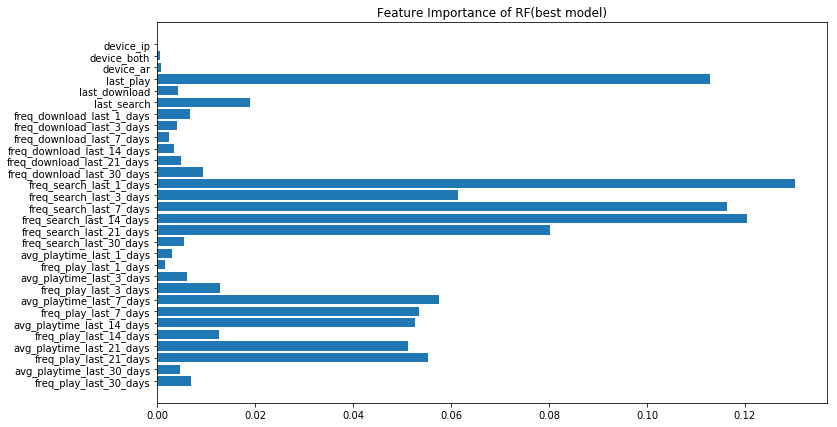

In [257]:
#plot feature importance
fig = plt.figure(figsize = (12,7))
plt.barh(np.arange(len(X.columns)), rfbest.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.title("Feature Importance of RF(best model)")


In [349]:
rfbest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

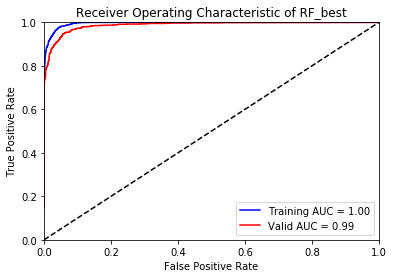

In [350]:
#evaluate
#Make prediction on training data
#prob is the probability

y_train_pred = rfbest.predict(X_train)
y_train_prob = rfbest.predict_proba(X_train)[:, 1]

#make prediction on test data
y_valid_pred = rfbest.predict(X_valid)
y_valid_prob = rfbest.predict_proba(X_valid)[:, 1]

get_performance_metrics(y_train, y_train_pred, y_valid, y_valid_pred)
plot_roc_curve(y_train, y_train_prob, y_valid, y_valid_prob, 'RF_best')

# ??

### 3.3 Summary of Random Forest
**The best estimator of RF is** 

    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
            max_depth=12, max_features='sqrt', max_leaf_nodes=None, 
            min_impurity_decrease=0.0, min_impurity_split=None, 
            min_samples_leaf=9, min_samples_split=7, 
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1, 
            oob_score=True, random_state=None, verbose=0, warm_start=False)
            
with **oob_score** :0.927462314405531 

**The most important features are(top 10):**

'freq_search_last_3_days', 'freq_search_last_14_days',
 'freq_search_last_7_days', 'freq_play_last_14_days',
 'freq_search_last_21_days', 'avg_playtime_last_7_days',
 'freq_search_last_1_days', 'avg_playtime_last_14_days',
 'freq_play_last_7_days'
 
 'freq_search_last_14_days' 'freq_search_last_7_days'
 'freq_play_last_7_days' 'avg_playtime_last_7_days'
 'freq_search_last_3_days' 'avg_playtime_last_14_days'
 'freq_search_last_1_days' 'freq_search_last_21_days'
 'freq_play_last_14_days'
 
 Which mean sense, because we are using 14 days as churn window, features about 14-day period provides more information than ohters, it seems search frequency speak louder than play_frequency, and average play time within each period also helps us making better prediction. For features of devices, none of them are important features, thus, features set with/without them doesn't make big difference.

## 4. Adaboost

In [258]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

Cross validation

sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None,n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
- estimator: weak learner:svm, decision stamp,etc
- cv: cross validation method(LFold:n_splits:K; 
- scoring: algorithm for accuracy


In [259]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

**AdaBoost**

AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
- base\_estimator : object, optional (default=DecisionTreeClassifier)
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes.

- **n\_estimators** : integer, optional (default=50)
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

- **learning\_rate** : float, optional (default=1.)
Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

- algorithm : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)
If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

- random\_state : int, RandomState instance or None, optional (default=None)

- **max_splits**: depth of tree
**Attributes**
- estimators_: list of classifiers
- classes_: classes label
- n\_classes_:
- estimator\_weights_: 
- estimator\_errors_: 

### 4.1 Building AdaBoost Model

In [260]:
kfolds = model_selection.KFold(n_splits = 10, random_state = 22)
adaboost = AdaBoostClassifier(n_estimators = 50, random_state = 41)
aresults = model_selection.cross_val_score(adaboost, X_train, y_train, cv = kfolds)

In [263]:
adaboost.fit(X_train, y_train).predict(X_valid)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [261]:
print("AUC score of K folds:", aresults)
print("Average AUC score of K folds:", aresults.mean())

AUC score of K folds: [0.9522293  0.9410828  0.92993631 0.95382166 0.94577352 0.93620415
 0.93779904 0.95215311 0.93939394 0.96012759]
Average AUC score of K folds: 0.944852141935615


In [264]:
#before call model's attrubutes, model should be fit first!!
fi_adaboost = pd.DataFrame(data = adaboost.feature_importances_, index = X.columns, columns = ['feature_importance']) 
print('Top 10 important feature in AdaBoost:',fi_adaboost.sort_values('feature_importance', ascending = False).index.values[:9])
fi_adaboost.sort_values('feature_importance', ascending = False)

Top 10 important feature in AdaBoost: ['freq_search_last_14_days' 'last_search' 'freq_search_last_1_days'
 'freq_download_last_30_days' 'avg_playtime_last_30_days'
 'avg_playtime_last_7_days' 'freq_play_last_3_days'
 'freq_download_last_21_days' 'freq_search_last_7_days']


feature_importance
freq_search_last_14_days                  0.12
last_search                               0.10
freq_search_last_1_days                   0.08
freq_download_last_30_days                0.08
avg_playtime_last_30_days                 0.08
avg_playtime_last_7_days                  0.06
freq_play_last_3_days                     0.06
freq_download_last_21_days                0.06
freq_search_last_7_days                   0.04
last_play                                 0.04
freq_play_last_7_days                     0.04
freq_play_last_1_days                     0.04
avg_playtime_last_1_days                  0.04
last_download                             0.02
freq_download_last_1_days                 0.02
freq_download_last_3_days                 0.02
freq_play_last_30_days                    0.02
freq_search_last_3_days                   0.02
freq_search_last_21_days                  0.02
avg_playtime_last_14_days                 0.02
freq_play_last_14_days                    0.02
freq_search_last_30_days                  0.00
freq_download_last_14_days                0.00
freq_download_last_7_days                 0.00
avg_playtime_last_3_days                  0.00
avg_playtime_last_21_days                 0.00
freq_play_last_21_days                    0.00
device_ar                                 0.00
device_both                               0.00
device_ip                                 0.00

([<matplotlib.axis.YTick at 0x12404190>,
 <a list of 30 Text yticklabel objects>)

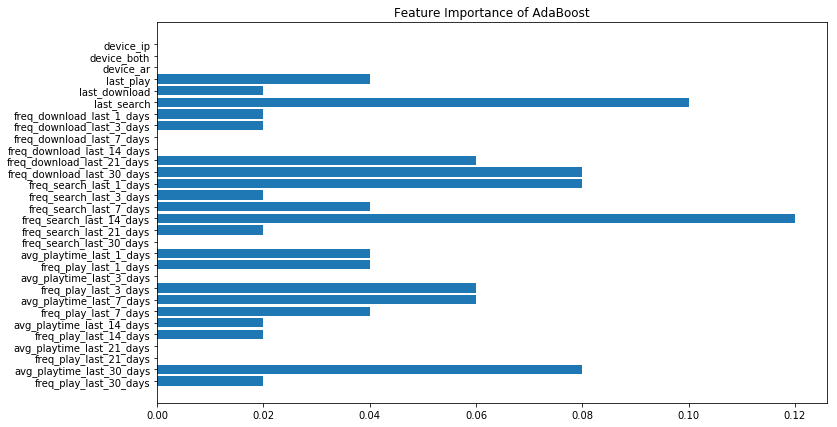

In [265]:
#plot feature importance
fig = plt.figure(figsize = (12,7))
plt.title("Feature Importance of AdaBoost")
plt.barh(np.arange(len(X.columns)), adaboost.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)

In [266]:
#evaluate
#Make prediction on training data
#prob is the probability
y_train_pred = adaboost.predict(X_train)
y_train_prob = adaboost.predict_proba(X_train)[:, 1]

#make prediction on test data
y_valid_pred = adaboost.predict(X_valid)
y_valid_prob = adaboost.predict_proba(X_valid)[:, 1]

ada_pm = get_performance_metrics(y_train, y_train_pred, y_valid, y_valid_pred)
plot_roc_curve(y_train, y_train_prob, y_valid, y_valid_prob, 'Adaboost')

In [267]:
ada_pm = get_performance_metrics(y_train, y_train_pred, y_valid, y_valid_pred)
ada_pm

train     valid
Accuracy           0.948996  0.933556
Precision          0.940288  0.931170
Recall             0.949411  0.932087
f1_score           0.944828  0.931628
AUC                0.949027  0.933515
Matthews_Corrcoef  0.897444  0.867007

In [268]:
get_confusion_matrix(y_valid, y_valid_pred)

Predicted Active  Predicted Churn
True Active              1006               70
True Churn                 69              947

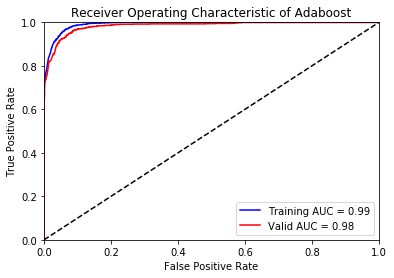

In [269]:
plot_roc_curve(y_train, y_train_prob, y_valid, y_valid_prob, 'Adaboost')

### 4.2 Parameter Tuning


In [270]:
#parameter tuning
#n_estimator
#learning_rate
#grid_search
param_grid = {'n_estimators': [20,50,100,150,200],
              'learning_rate': np.arange(0.2, 1.2, 0.2), 
             }

In [271]:
ada_grid_search = GridSearchCV(adaboost, param_grid, scoring = 'roc_auc', cv = 5, n_jobs = -1)
ada_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=41),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 50, 100, 150, 200], 'learning_rate': array([0.2, 0.4, 0.6, 0.8, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [272]:
print(ada_grid_search.best_estimator_)
print(ada_grid_search.best_score_ , ada_grid_search.best_params_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=50, random_state=41)
0.9891265547094553 {'learning_rate': 0.2, 'n_estimators': 50}


### 4.3 Evaluate best Adaboost model

In [273]:
#use best model to do prediction
#adabest = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
#          learning_rate=0.2, n_estimators=50, random_state=7)
adabest = ada_grid_search.best_estimator_
adabest.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=50, random_state=41)

In [274]:
#Make prediction on training data
ada_y_train_pred = adabest.predict(X_train)
ada_y_train_prob = adabest.predict_proba(X_train)[:, 1]

#make prediction on test data
ada_y_valid_pred = adabest.predict(X_valid)
ada_y_valid_prob = adabest.predict_proba(X_valid)[:, 1]

In [275]:
ada_best_pm = get_performance_metrics(y_train, ada_y_train_pred, y_valid, ada_y_valid_pred)
ada_best_pm

train     valid
Accuracy           0.946605  0.936902
Precision          0.941502  0.935039
Recall             0.942481  0.935039
f1_score           0.941991  0.935039
AUC                0.946300  0.936851
Matthews_Corrcoef  0.892531  0.873701

In [276]:
get_confusion_matrix(y_valid, ada_y_valid_pred)

Predicted Active  Predicted Churn
True Active              1010               66
True Churn                 66              950

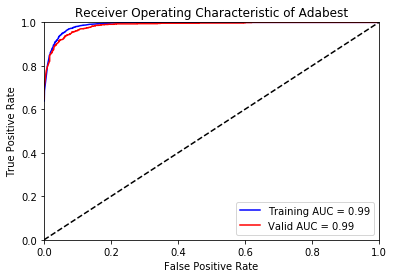

In [278]:
plot_roc_curve(y_train, ada_y_train_prob, y_valid, ada_y_valid_prob, 'Adabest')

In [279]:
fi_adabest = pd.DataFrame(data = adabest.feature_importances_, index = X.columns, columns = ['feature_importance']) 
print('Top 10 important feature in AdaBoost(best model):',fi_adabest.sort_values('feature_importance', ascending = False).index.values[:9])
fi_adabest.sort_values('feature_importance', ascending = False)

Top 10 important feature in AdaBoost(best model): ['last_play' 'freq_search_last_1_days' 'last_search'
 'freq_download_last_1_days' 'avg_playtime_last_1_days'
 'freq_search_last_14_days' 'freq_play_last_21_days'
 'freq_download_last_30_days' 'freq_play_last_7_days']


feature_importance
last_play                                 0.20
freq_search_last_1_days                   0.16
last_search                               0.12
freq_download_last_1_days                 0.10
avg_playtime_last_1_days                  0.08
freq_search_last_14_days                  0.06
freq_play_last_21_days                    0.04
freq_download_last_30_days                0.04
freq_play_last_7_days                     0.04
avg_playtime_last_30_days                 0.04
freq_search_last_21_days                  0.02
freq_download_last_21_days                0.02
freq_search_last_3_days                   0.02
freq_play_last_1_days                     0.02
avg_playtime_last_7_days                  0.02
freq_play_last_14_days                    0.02
freq_download_last_3_days                 0.00
last_download                             0.00
device_ar                                 0.00
device_both                               0.00
freq_play_last_30_days                    0.00
freq_search_last_7_days                   0.00
freq_download_last_7_days                 0.00
freq_download_last_14_days                0.00
freq_search_last_30_days                  0.00
avg_playtime_last_3_days                  0.00
freq_play_last_3_days                     0.00
avg_playtime_last_14_days                 0.00
avg_playtime_last_21_days                 0.00
device_ip                                 0.00

([<matplotlib.axis.YTick at 0x120b6970>,
 <a list of 30 Text yticklabel objects>)

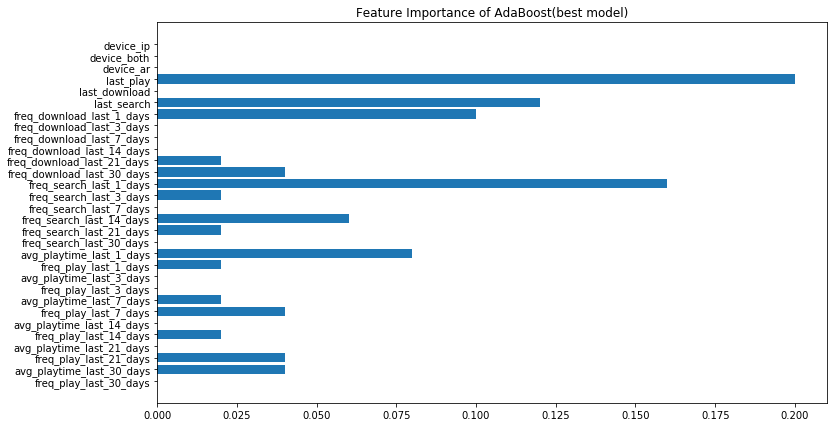

In [280]:
#plot feature importance
fig = plt.figure(figsize = (12,7))
plt.title("Feature Importance of AdaBoost(best model)")
plt.barh(np.arange(len(X.columns)), adabest.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)

### 4.3 Summary of AdaBoost Model
**Best model**
         
         AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=50, random_state=7)
**with auc** = 0.98

**Important Features of Ada are(top 10):**

'freq_search_last_14_days', 'freq_search_last_1_days',
 'avg_playtime_last_3_days', 'freq_download_last_7_days',
 'freq_download_last_21_days', 'avg_playtime_last_21_days',
 'freq_play_last_21_days', 'avg_playtime_last_7_days',
 'freq_play_last_3_days',
 
**Important Features of RF are(top 10):** 
 'freq_search_last_3_days', 'freq_search_last_14_days', 'freq_search_last_7_days', 'freq_play_last_14_days', 'freq_search_last_21_days', 'avg_playtime_last_7_days', 'freq_search_last_1_days', 'avg_playtime_last_14_days', 'freq_play_last_7_days'

### 5.GradientBoosting


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators = 30, random_state = 8)
gresults = model_selection.cross_val_score(gboost, X, y, cv = kfolds)

In [83]:
gresults.mean() 

0.9862870198584484

## 6. Using total data to train model
**total data including precent, device**, but since none of the above model show device_type are important, we may drop them later. but first train all features.

In [281]:
total_feature = pd.read_csv("D:/MusicFile/all_feature_total_8366.csv", index_col = 0)

In [282]:

total_feature.sample(8)

freq_play_last_30_days  avg_playtime_last_30_days  \
uid                                                            
168656704                   478.0                 201.294979   
168491088                  3258.0                 253.374463   
167854960                   292.0                 174.955479   
168941360                   146.0                 133.034247   
167643024                   385.0                 169.072727   
167913792                   486.0                 143.253086   
167714160                    82.0                 172.012195   
167576192                   819.0                 166.937729   

           freq_play_last_21_days  avg_playtime_last_21_days  \
uid                                                            
168656704                    21.0                  83.952381   
168491088                  2268.0                 250.708113   
167854960                   217.0                 166.847926   
168941360                    96.0                 130.458333   
167643024                   308.0                 180.590909   
167913792                   255.0                 150.050980   
167714160                    52.0                 152.480769   
167576192                   580.0                 165.789655   

           freq_play_last_14_days  avg_playtime_last_14_days  \
uid                                                            
168656704                    20.0                  88.000000   
168491088                  1407.0                 235.784648   
167854960                   124.0                 181.612903   
168941360                    93.0                 126.569892   
167643024                    95.0                 162.347368   
167913792                   169.0                 136.053254   
167714160                    48.0                 155.520833   
167576192                   317.0                 168.864353   

           freq_play_last_7_days  avg_playtime_last_7_days  \
uid                                                          
168656704                   20.0                 88.000000   
168491088                  666.0                231.159159   
167854960                   58.0                155.189655   
168941360                   58.0                120.620690   
167643024                   56.0                197.285714   
167913792                   75.0                101.906667   
167714160                   29.0                163.310345   
167576192                  148.0                165.472973   

           freq_play_last_3_days  avg_playtime_last_3_days    ...     \
uid                                                           ...      
168656704                    0.0                  0.000000    ...      
168491088                  313.0                242.734824    ...      
167854960                   37.0                180.297297    ...      
168941360                   43.0                120.465116    ...      
167643024                    2.0                 15.000000    ...      
167913792                   28.0                142.107143    ...      
167714160                   22.0                150.500000    ...      
167576192                   65.0                162.923077    ...      

           freq_download_last_3_days  freq_download_last_1_days  last_search  \
uid                                                                            
168656704                        0.0                        0.0         30.0   
168491088                       26.0                       25.0          3.0   
167854960                        0.0                        0.0          6.0   
168941360                        0.0                        0.0          5.0   
167643024                        0.0                        0.0          4.0   
167913792                       37.0                       37.0          7.0   
167714160                        2.0                        1.0          6.0   
167576192                 

In [283]:
#split feature and label
X_tt = total_feature.drop('Churn',axis = 1)
y_tt = total_feature['Churn']

In [284]:
X_ttrain, X_tvalid, y_ttrain, y_tvalid = train_test_split(X_tt,y_tt, test_size = 0.25, random_state = 90)

In [285]:
X_ttrain.shape

(6274, 31)

### 6.1 Decision Tree

In [359]:
clft = tree.DecisionTreeClassifier(max_depth = 10, max_features = 5)
modelt = clft.fit(X_ttrain, y_ttrain)
modelt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [360]:
#Make prediction on training data
#prob is the probability
y_ttrain_pred = clft.predict(X_ttrain)
y_ttrain_prob = clft.predict_proba(X_ttrain)[:, 1]

#make prediction on test data
y_tvalid_pred = clft.predict(X_tvalid)
y_tvalid_prob = clft.predict_proba(X_tvalid)[:, 1]

In [361]:
dt_pm_total = get_performance_metrics(y_ttrain, y_ttrain_pred, y_tvalid, y_tvalid_pred)
dt_pm_total

train     valid
Accuracy           0.977526  0.926864
Precision          0.966073  0.910345
Recall             0.986283  0.937120
f1_score           0.976073  0.923538
AUC                0.978103  0.927421
Matthews_Corrcoef  0.955072  0.853809

In [362]:
get_confusion_matrix(y_tvalid, y_tvalid_pred)

Predicted Active  Predicted Churn
True Active              1015               91
True Churn                 62              924

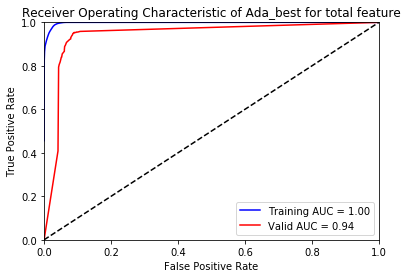

In [363]:
plot_roc_curve(y_ttrain, y_ttrain_prob, y_tvalid, y_tvalid_prob, 'Ada_best for total feature')

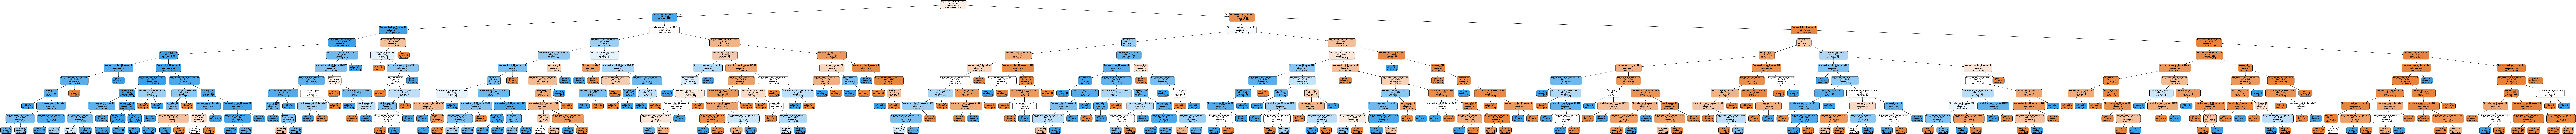

In [292]:
#visualize tree
tdot_data = tree.export_graphviz(modelt, out_file = None,
                                feature_names = X_tt.columns, \
                               filled = True, rounded = True, \
                               special_characters = True)
graph2 = pydotplus.graph_from_dot_data(tdot_data)
Image(graph2.create_png())

In [293]:
#feature importance
tfi_DT = pd.DataFrame(data = clft.feature_importances_, index = X_tt.columns, columns = ['feature_importance']) 
print(tfi_DT.sort_values('feature_importance', ascending = False).index.values[:10])
tfi_DT.sort_values('feature_importance', ascending = False)

['freq_search_last_21_days' 'freq_search_last_7_days'
 'freq_play_last_14_days' 'last_play' 'freq_search_last_1_days'
 'freq_download_last_30_days' 'freq_play_last_21_days'
 'avg_playtime_last_3_days' 'avg_playtime_last_30_days'
 'freq_play_last_30_days']


feature_importance
freq_search_last_21_days              0.714580
freq_search_last_7_days               0.057429
freq_play_last_14_days                0.048537
last_play                             0.023803
freq_search_last_1_days               0.020599
freq_download_last_30_days            0.013556
freq_play_last_21_days                0.012178
avg_playtime_last_3_days              0.009485
avg_playtime_last_30_days             0.009058
freq_play_last_30_days                0.009029
avg_playtime_last_14_days             0.008776
avg_playtime_last_7_days              0.008603
avg_playtime_last_21_days             0.008549
freq_download_last_7_days             0.007201
freq_search_last_30_days              0.006795
precent                               0.006731
freq_play_last_7_days                 0.006488
freq_download_last_21_days            0.005691
last_download                         0.004951
avg_playtime_last_1_days              0.004951
freq_download_last_1_days             0.002468
freq_download_last_14_days            0.002372
freq_download_last_3_days             0.001829
last_search                           0.001796
freq_play_last_3_days                 0.001440
device_both                           0.000954
freq_search_last_14_days              0.000809
device_ar                             0.000650
freq_play_last_1_days                 0.000523
freq_search_last_3_days               0.000155
device_ip                             0.000011

([<matplotlib.axis.YTick at 0x121cd830>,
 <a list of 31 Text yticklabel objects>)

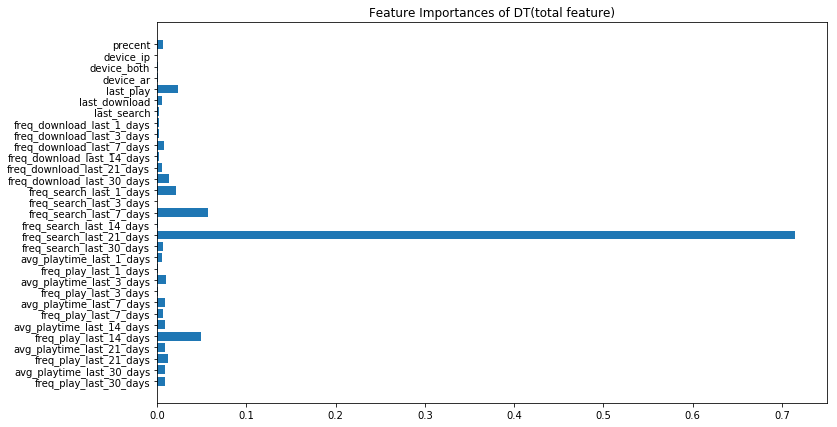

In [294]:
#plot feature importance of DT
fig = plt.figure(figsize=(12,7))
plt.title('Feature Importances of DT(total feature)')
plt.barh(np.arange(len(X_tt.columns)), clft.feature_importances_)
plt.yticks(np.arange(len(X_tt.columns)), X_tt.columns)

### 6.2 Radom Forest

In [295]:
#RF
trf = RandomForestClassifier(n_estimators = 100,
                max_depth = 5,
                min_samples_split = 10,
                min_samples_leaf = 5, 
                oob_score = True,
                random_state = 123)
#not need to split train/test, so put all into RF model
trf.fit(X_tt, y_tt)
y_ttp = trf.predict_proba(X_tt)[:,1]
print("oob score:", trf.oob_score_)
print("auc score:", roc_auc_score(y_tt, y_ttp))
#try_forest.score(X_test, y_test)

oob score: 0.9471671049486015
auc score: 0.9914036938138515


In [296]:
tfi_RF = pd.DataFrame(data = trf.feature_importances_, index = X_tt.columns, columns = ['feature_importance']) 
print("Top 10 important feature:", tfi_RF.sort_values('feature_importance', ascending = False).index.values[:9])
tfi_RF.sort_values('feature_importance', ascending = False)

Top 10 important feature: ['last_play' 'freq_search_last_3_days' 'freq_search_last_14_days'
 'freq_search_last_21_days' 'freq_search_last_7_days'
 'freq_search_last_1_days' 'freq_play_last_14_days'
 'freq_play_last_7_days' 'avg_playtime_last_14_days']


feature_importance
last_play                             0.155367
freq_search_last_3_days               0.132205
freq_search_last_14_days              0.110916
freq_search_last_21_days              0.110238
freq_search_last_7_days               0.083398
freq_search_last_1_days               0.071984
freq_play_last_14_days                0.067761
freq_play_last_7_days                 0.044187
avg_playtime_last_14_days             0.042299
avg_playtime_last_7_days              0.041866
freq_search_last_30_days              0.032388
freq_download_last_30_days            0.018600
avg_playtime_last_21_days             0.016248
avg_playtime_last_3_days              0.014559
last_search                           0.009547
freq_play_last_21_days                0.008958
freq_play_last_3_days                 0.005628
freq_download_last_3_days             0.005502
freq_download_last_1_days             0.005223
freq_play_last_30_days                0.004850
freq_download_last_14_days            0.004749
freq_download_last_21_days            0.003298
freq_download_last_7_days             0.002776
last_download                         0.002247
avg_playtime_last_30_days             0.001583
avg_playtime_last_1_days              0.001426
freq_play_last_1_days                 0.001288
precent                               0.000686
device_both                           0.000129
device_ar                             0.000069
device_ip                             0.000026

([<matplotlib.axis.YTick at 0x17346e50>,
 <a list of 31 Text yticklabel objects>)

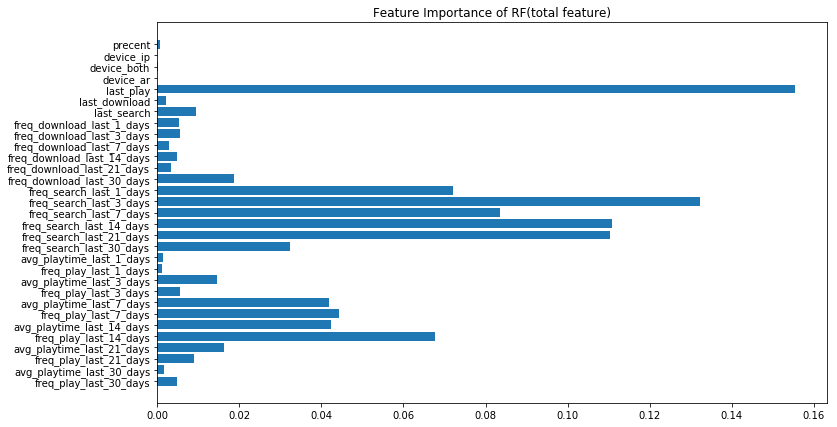

In [297]:
#plot feature importance
fig=plt.figure(figsize = (12,7))
plt.title("Feature Importance of RF(total feature)")
plt.barh(np.arange(len(X_tt.columns)), trf.feature_importances_)
plt.yticks(np.arange(len(X_tt.columns)), X_tt.columns)

In [298]:
#grid_search
param_grid = {'n_estimators': [80, 90, 100, 110, 120],
              'max_depth': [4,6,8,10,12], 
              'min_samples_split': [4,5,6,7,8],
              'min_samples_leaf':[5,6,7,8]
             }

rfct = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', 
                             n_estimators = 50, oob_score = True)

In [299]:
rfct_grid_search = GridSearchCV(estimator = rfct, param_grid = param_grid, cv = 3, n_jobs = -1)
rfct_grid_search.fit(X_tt, y_tt)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [80, 90, 100, 110, 120], 'max_depth': [4, 6, 8, 10, 12], 'min_samples_split': [4, 5, 6, 7, 8], 'min_samples_leaf': [5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [300]:
#check result
print(rfct_grid_search.best_estimator_)
print(rfct_grid_search.best_score_ , rfct_grid_search.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
0.9070045421945971 {'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 80}


In [301]:
rfct_best = rfct_grid_search.best_estimator_
rfct_best.fit(X_tt,y_tt)
y_tpred = rfct_best.predict_proba(X_tt)[:,1]
print("oob score:", rfct_best.oob_score_)
print("auc score:", roc_auc_score(y_tt, y_tpred))

oob score: 0.9474061678221373
auc score: 0.9958049267997847


In [304]:
tfi_RF_best = pd.DataFrame(data = rfct_best.feature_importances_, index = X_tt.columns, columns = ['feature_importance']) 
print("Top 10 important feature:", tfi_RF_best.sort_values('feature_importance', ascending = False).index.values[:9])
tfi_RF_best.sort_values('feature_importance', ascending = False)

Top 10 important feature: ['last_play' 'freq_search_last_14_days' 'freq_search_last_7_days'
 'freq_search_last_21_days' 'freq_search_last_3_days'
 'avg_playtime_last_14_days' 'freq_play_last_7_days'
 'avg_playtime_last_7_days' 'freq_play_last_14_days']


feature_importance
last_play                             0.123074
freq_search_last_14_days              0.121597
freq_search_last_7_days               0.109388
freq_search_last_21_days              0.094300
freq_search_last_3_days               0.082931
avg_playtime_last_14_days             0.074243
freq_play_last_7_days                 0.059939
avg_playtime_last_7_days              0.055977
freq_play_last_14_days                0.051552
freq_search_last_1_days               0.039981
freq_play_last_21_days                0.036800
last_search                           0.021596
freq_play_last_3_days                 0.017256
freq_play_last_30_days                0.017073
freq_search_last_30_days              0.016301
avg_playtime_last_3_days              0.015321
avg_playtime_last_21_days             0.015249
freq_download_last_30_days            0.007685
freq_download_last_1_days             0.006502
avg_playtime_last_30_days             0.005422
freq_download_last_3_days             0.005021
last_download                         0.004394
precent                               0.004082
freq_download_last_14_days            0.003116
freq_download_last_7_days             0.003026
freq_download_last_21_days            0.002900
freq_play_last_1_days                 0.002362
avg_playtime_last_1_days              0.002082
device_ar                             0.000484
device_both                           0.000348
device_ip                             0.000002

([<matplotlib.axis.YTick at 0x17311070>,
 <a list of 31 Text yticklabel objects>)

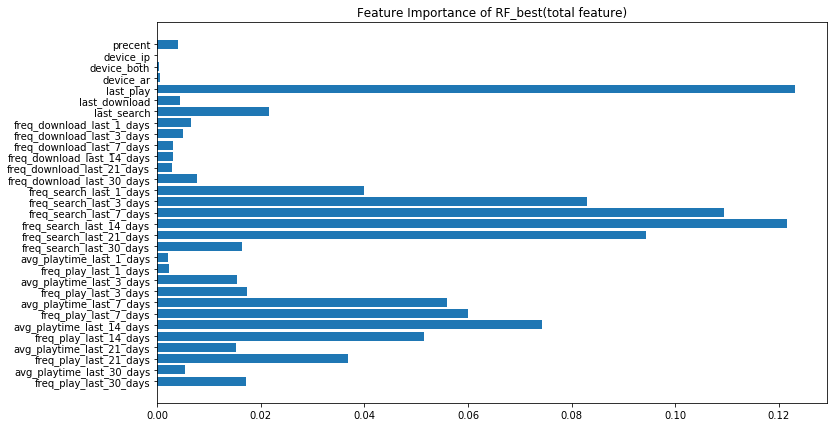

In [305]:
#plot feature importance
fig=plt.figure(figsize = (12,7))
plt.title("Feature Importance of RF_best(total feature)")
plt.barh(np.arange(len(X_tt.columns)), rfct_best.feature_importances_)
plt.yticks(np.arange(len(X_tt.columns)), X_tt.columns)

### 6.3 AdaBoost


In [306]:
#kfolds

tadaboost = AdaBoostClassifier(n_estimators = 50, random_state = 96)
taresults = model_selection.cross_val_score(tadaboost, X_ttrain, y_ttrain, cv = kfolds)
tadaboost.fit(X_ttrain, y_ttrain).predict(X_tvalid)
print("AUC score of K folds:", taresults)
print("Average AUC score of K folds:", taresults.mean())

AUC score of K folds: [0.93949045 0.93789809 0.94267516 0.9522293  0.94098884 0.9553429
 0.93141946 0.94417863 0.94577352 0.94258373]
Average AUC score of K folds: 0.9432580074970286


In [307]:
fi_tadaboost = pd.DataFrame(data = tadaboost.feature_importances_, index = X_tt.columns, columns = ['feature_importance']) 
print('Top 10 important feature in AdaBoost:',fi_tadaboost.sort_values('feature_importance', ascending = False).index.values[:9])
fi_tadaboost.sort_values('feature_importance', ascending = False)

Top 10 important feature in AdaBoost: ['freq_search_last_7_days' 'last_play' 'freq_search_last_1_days'
 'avg_playtime_last_3_days' 'avg_playtime_last_30_days'
 'freq_play_last_14_days' 'last_search' 'avg_playtime_last_14_days'
 'freq_play_last_7_days']


feature_importance
freq_search_last_7_days                   0.12
last_play                                 0.12
freq_search_last_1_days                   0.10
avg_playtime_last_3_days                  0.08
avg_playtime_last_30_days                 0.06
freq_play_last_14_days                    0.06
last_search                               0.06
avg_playtime_last_14_days                 0.04
freq_play_last_7_days                     0.04
freq_download_last_7_days                 0.04
device_ar                                 0.02
last_download                             0.02
freq_download_last_1_days                 0.02
freq_download_last_14_days                0.02
freq_download_last_30_days                0.02
freq_play_last_30_days                    0.02
freq_search_last_14_days                  0.02
freq_search_last_21_days                  0.02
freq_search_last_30_days                  0.02
avg_playtime_last_1_days                  0.02
freq_play_last_1_days                     0.02
avg_playtime_last_7_days                  0.02
avg_playtime_last_21_days                 0.02
precent                                   0.02
freq_search_last_3_days                   0.00
freq_download_last_21_days                0.00
freq_download_last_3_days                 0.00
freq_play_last_3_days                     0.00
freq_play_last_21_days                    0.00
device_both                               0.00
device_ip                                 0.00

([<matplotlib.axis.YTick at 0x1370e910>,
 <a list of 31 Text yticklabel objects>)

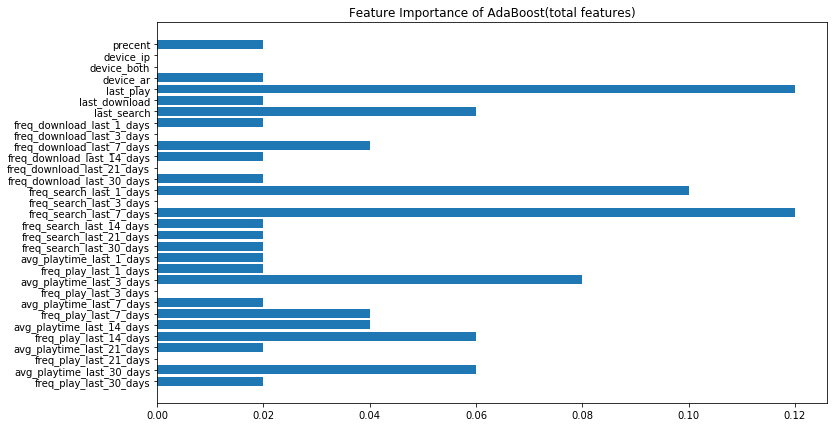

In [308]:
#plot feature importance of AdaBoost
fig = plt.figure(figsize = (12,7))
plt.title("Feature Importance of AdaBoost(total features)")
plt.barh(np.arange(len(X_tt.columns)), tadaboost.feature_importances_)
plt.yticks(np.arange(len(X_tt.columns)), X_tt.columns)

In [309]:
#evaluate
#Make prediction on training data
tada_y_train_pred = tadaboost.predict(X_ttrain)
tada_y_train_prob = tadaboost.predict_proba(X_ttrain)[:, 1]

#make prediction on test data
tada_y_valid_pred = tadaboost.predict(X_tvalid)
tada_y_valid_prob = tadaboost.predict_proba(X_tvalid)[:, 1]

In [310]:
ada_pm_total = get_performance_metrics(y_ttrain, tada_y_train_pred, y_tvalid, tada_y_valid_pred)
ada_pm_total

train     valid
Accuracy           0.949793  0.940727
Precision          0.939507  0.935354
Recall             0.953361  0.939148
f1_score           0.946383  0.937247
AUC                0.950028  0.940641
Matthews_Corrcoef  0.899268  0.881094

In [311]:
get_confusion_matrix(y_tvalid, tada_y_valid_pred)

Predicted Active  Predicted Churn
True Active              1042               64
True Churn                 60              926

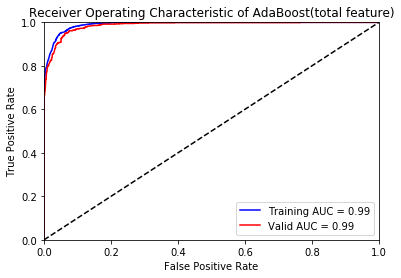

In [313]:
plot_roc_curve(y_ttrain, tada_y_train_prob, y_tvalid, tada_y_valid_prob, "AdaBoost(total feature)")

In [314]:
#grid_search
param_grid = {'n_estimators': [20,50,100,150,200],
              'learning_rate': np.arange(0.2, 1.2, 0.2), 
             }

In [323]:
tada_grid_search = GridSearchCV(tadaboost, param_grid, scoring = 'roc_auc', cv = 5, n_jobs = -1)
tada_grid_search.fit(X_ttrain, y_ttrain)
print(tada_grid_search.best_estimator_)
print(tada_grid_search.best_score_ , tada_grid_search.best_params_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=20, random_state=96)
0.9882904591353598 {'learning_rate': 0.2, 'n_estimators': 20}


In [324]:

#use best model to do prediction
tada_best =tada_grid_search.best_estimator_
tada_best.fit(X_ttrain, y_ttrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=20, random_state=96)

In [325]:
#Make prediction on training data
tada_y_train_pred = tada_best.predict(X_ttrain)
tada_y_train_prob = tada_best.predict_proba(X_ttrain)[:, 1]

#make prediction on test data
tada_y_valid_pred = tada_best.predict(X_tvalid)
tada_y_valid_prob = tada_best.predict_proba(X_tvalid)[:, 1]

In [326]:
ada_pm_best_total = get_performance_metrics(y_ttrain, tada_y_train_pred, y_tvalid, tada_y_valid_pred)
ada_pm_best_total 

train     valid
Accuracy           0.943736  0.940727
Precision          0.936033  0.938900
Recall             0.943416  0.935091
f1_score           0.939710  0.936992
AUC                0.943715  0.940421
Matthews_Corrcoef  0.886994  0.881042

In [327]:
get_confusion_matrix(y_tvalid, tada_y_valid_pred)

Predicted Active  Predicted Churn
True Active              1046               60
True Churn                 64              922

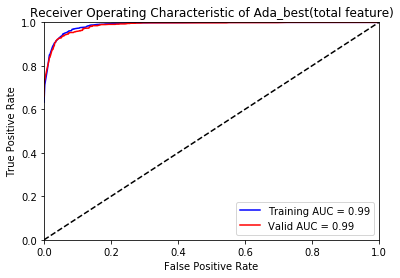

In [328]:
plot_roc_curve(y_ttrain, tada_y_train_prob, y_tvalid, tada_y_valid_prob, "Ada_best(total feature)")

In [329]:
fi_tadabest = pd.DataFrame(data = tada_best.feature_importances_, index = X_tt.columns, columns = ['feature_importance']) 
print('Top 10 important feature in AdaBoost:',fi_tadabest.sort_values('feature_importance', ascending = False).index.values[:9])
fi_tadabest.sort_values('feature_importance', ascending = False)

Top 10 important feature in AdaBoost: ['last_play' 'freq_search_last_1_days' 'freq_download_last_1_days'
 'freq_play_last_7_days' 'avg_playtime_last_1_days'
 'freq_download_last_30_days' 'freq_search_last_7_days'
 'freq_play_last_14_days' 'freq_play_last_21_days']


feature_importance
last_play                                 0.30
freq_search_last_1_days                   0.25
freq_download_last_1_days                 0.15
freq_play_last_7_days                     0.05
avg_playtime_last_1_days                  0.05
freq_download_last_30_days                0.05
freq_search_last_7_days                   0.05
freq_play_last_14_days                    0.05
freq_play_last_21_days                    0.05
device_ar                                 0.00
device_both                               0.00
last_search                               0.00
device_ip                                 0.00
freq_download_last_3_days                 0.00
freq_download_last_7_days                 0.00
freq_download_last_14_days                0.00
freq_download_last_21_days                0.00
last_download                             0.00
freq_play_last_30_days                    0.00
freq_search_last_3_days                   0.00
avg_playtime_last_30_days                 0.00
freq_search_last_14_days                  0.00
freq_search_last_21_days                  0.00
freq_search_last_30_days                  0.00
freq_play_last_1_days                     0.00
avg_playtime_last_3_days                  0.00
freq_play_last_3_days                     0.00
avg_playtime_last_7_days                  0.00
avg_playtime_last_14_days                 0.00
avg_playtime_last_21_days                 0.00
precent                                   0.00

([<matplotlib.axis.YTick at 0x147ec590>,
 <a list of 31 Text yticklabel objects>)

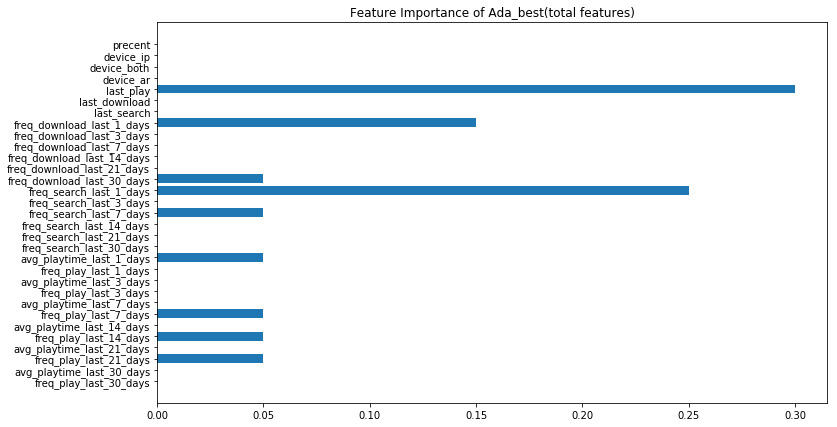

In [333]:
#plot feature importance of AdaBoost
fig=plt.figure(figsize = (12,7))
plt.title("Feature Importance of Ada_best(total features)")
plt.barh(np.arange(len(X_tt.columns)), tada_best.feature_importances_)
plt.yticks(np.arange(len(X_tt.columns)), X_tt.columns)

In [334]:
#compare preformance
dt_pm.reset_index(inplace = True)
ada_pm.reset_index(inplace = True)
ada_best_pm.reset_index(inplace = True)
dt_pm_total.reset_index(inplace = True)
ada_pm_total.reset_index(inplace = True)
ada_pm_best_total.reset_index(inplace = True)

In [335]:
dt_pm
#ada_pm
#ada_best_pm
#dt_pm_total
#ada_pm_total.set_index('level_0')
#ada_pm_best_total

index     train     valid
0           Accuracy  0.974498  0.930688
1          Precision  0.958923  0.916746
2             Recall  0.986833  0.942913
3           f1_score  0.972678  0.929646
4                AUC  0.975412  0.931029
5  Matthews_Corrcoef  0.949121  0.861704

In [338]:
pm = pd.merge(dt_pm, ada_pm, on = 'index',suffixes=['_dt', '_ada'])
pm

index  train_dt  valid_dt  train_ada  valid_ada
0           Accuracy  0.974498  0.930688   0.948996   0.933556
1          Precision  0.958923  0.916746   0.940288   0.931170
2             Recall  0.986833  0.942913   0.949411   0.932087
3           f1_score  0.972678  0.929646   0.944828   0.931628
4                AUC  0.975412  0.931029   0.949027   0.933515
5  Matthews_Corrcoef  0.949121  0.861704   0.897444   0.867007

In [339]:

pm_all = pm.merge(ada_best_pm,on=['index'], how = 'inner').rename(columns={'train':'train_ada_best','valid':'valid_ada_best'}) \
      .merge(dt_pm_total,on=['index'], how = 'inner').rename(columns={'train':'train_dt_total','valid':'valid_dt_total'}) \
      .merge(ada_pm_total,on=['index'], how = 'inner').rename(columns={'train':'train_ada_total','valid':'valid_ada_total'}) \
    .merge(ada_pm_best_total,on=['index'], how = 'inner').rename(columns={'train':'train_ada_total_best','valid':'valid_ada_total_best'}) \
    #.set_index('index')

In [341]:
pm_all.set_index("index")

train_dt  valid_dt  train_ada  valid_ada  train_ada_best  \
index                                                                         
Accuracy           0.974498  0.930688   0.948996   0.933556        0.946605   
Precision          0.958923  0.916746   0.940288   0.931170        0.941502   
Recall             0.986833  0.942913   0.949411   0.932087        0.942481   
f1_score           0.972678  0.929646   0.944828   0.931628        0.941991   
AUC                0.975412  0.931029   0.949027   0.933515        0.946300   
Matthews_Corrcoef  0.949121  0.861704   0.897444   0.867007        0.892531   

                   valid_ada_best  train_dt_total  valid_dt_total  \
index                                                               
Accuracy                 0.936902        0.983264        0.926386   
Precision                0.935039        0.975635        0.919355   
Recall                   0.935039        0.988683        0.924949   
f1_score                 0.935039        0.982115        0.922144   
AUC                      0.936851        0.983621        0.926308   
Matthews_Corrcoef        0.873701        0.966466        0.852349   

                   train_ada_total  valid_ada_total  train_ada_total_best  \
index                                                                       
Accuracy                  0.949793         0.940727              0.943736   
Precision                 0.939507         0.935354              0.936033   
Recall                    0.953361         0.939148              0.943416   
f1_score                  0.946383         0.937247              0.939710   
AUC                       0.950028         0.940641              0.943715   
Matthews_Corrcoef         0.899268         0.881094              0.886994   

                   valid_ada_total_best  
index                                    
Accuracy                       0.940727  
Precision                      0.938900  
Recall                         0.935091  
f1_score                       0.936992  
AUC                            0.940421  
Matthews_Corrcoef              0.881042

In [343]:
pm_all.to_csv("D:/MusicFile/result/pm_all_new.csv", header = True)